Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset into dataFrame

In [2]:
df = pd.read_csv('titanic.csv')

Exploring the Data

In [3]:
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Forward and Backward fill on 'Age'

In [4]:
# forward fill
df['Age_ffill'] = df['Age'].fillna(method='ffill')

# backward fill
df['Age_bfill'] = df['Age'].fillna(method='bfill')


/tmp/ipython-input-4-2274646412.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_ffill'] = df['Age'].fillna(method='ffill')
/tmp/ipython-input-4-2274646412.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_bfill'] = df['Age'].fillna(method='bfill')


Missing values in cabin

In [5]:
df['Cabin'] = df['Cabin'].fillna("unknown")
print(df['Cabin'].head())

0    unknown
1        C85
2    unknown
3       C123
4    unknown
Name: Cabin, dtype: object


Removing duplicates

In [6]:
df = df.drop_duplicates()

Encoding categorial column

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

Scale Numerical Features "Fare"

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

Pair plot

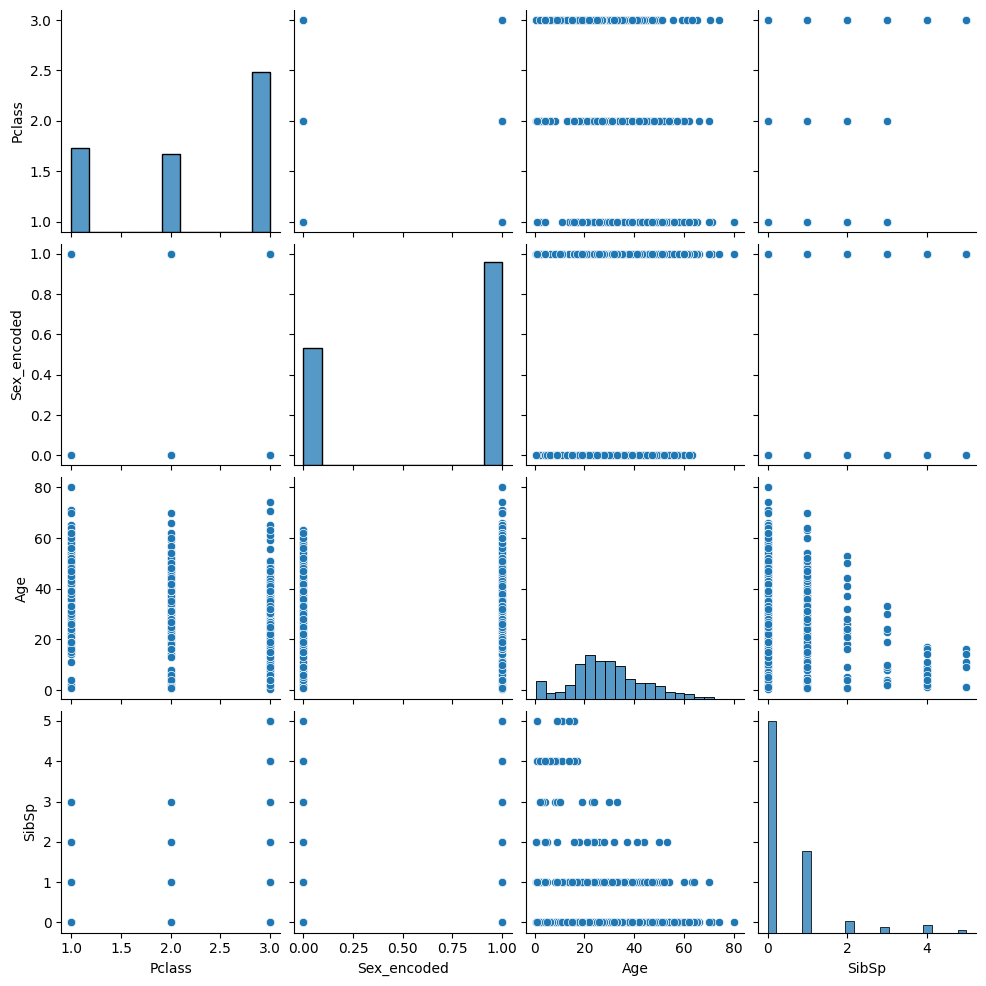

In [9]:
sns.pairplot(df[['Pclass', 'Sex_encoded', 'Age', 'SibSp']].dropna())
plt.show()

Correlation Heatmap

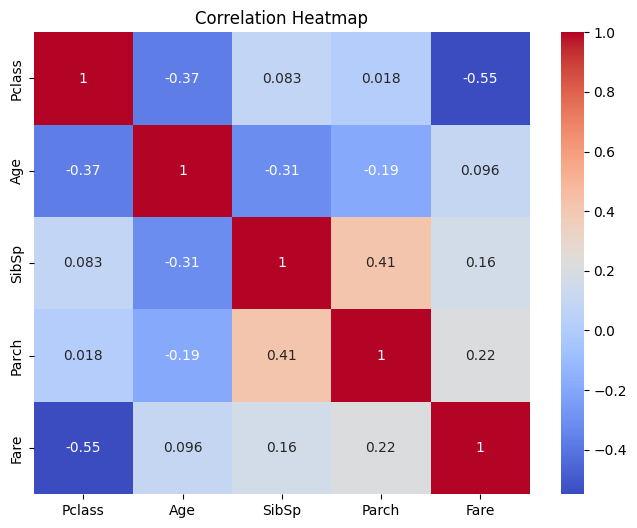

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
